In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def show_images(canny, img_final):
    plt.figure(figsize=(20, 15))
    plt.subplot(121),plt.imshow(canny),plt.title('Canny edge', fontsize=25)
    plt.subplot(122),plt.imshow(img_final),plt.title('Final result', fontsize=25)

def count(img, gb_kernel=(15,15), lower=30, upper=135):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ga_blur = cv2.GaussianBlur(gray, gb_kernel, 0)
    
    canny = cv2.Canny(ga_blur, lower, upper)
    
    cont_img = canny.copy()
    contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    img_final = img.copy()
    
    for i in range(len(contours)):
        cv2.drawContours(img_final, contours[i], -1, (0,255,0), 3)
        # add text
        x,y,w,h = cv2.boundingRect(contours[i])
        cv2.putText(img_final, 'C' + str(i+1),(x-10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1.1,(255,0,0),2)
   
    show_images(canny, img_final)
    
    print("Number of Contours found = " + str(len(contours)))


Number of Contours found = 5


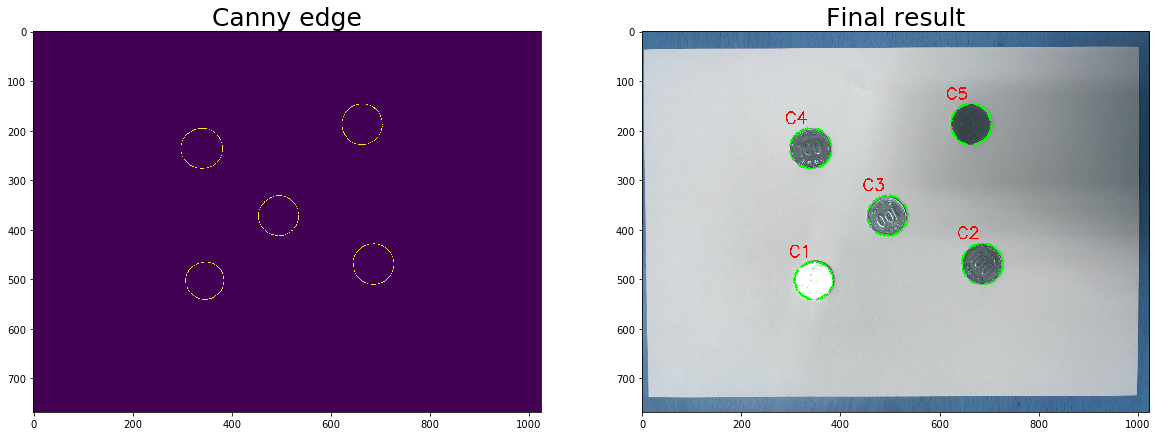

In [3]:
img = cv2.imread('./coin/sIMG_8253.jpg')

count(img)

Number of Contours found = 9


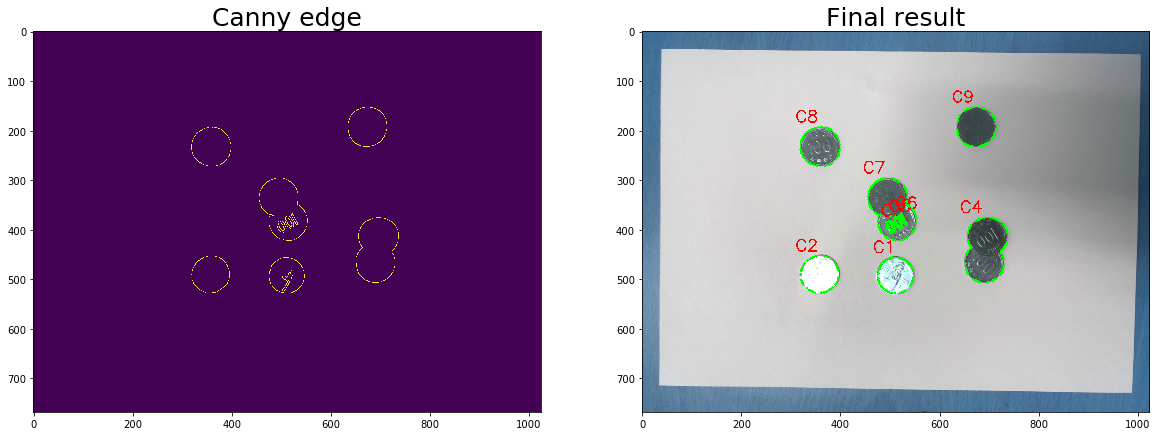

In [4]:
img = cv2.imread('./coin/sIMG_8254.jpg')

count(img, gb_kernel=(7,7), lower=50, upper=270)

Number of Contours found = 13


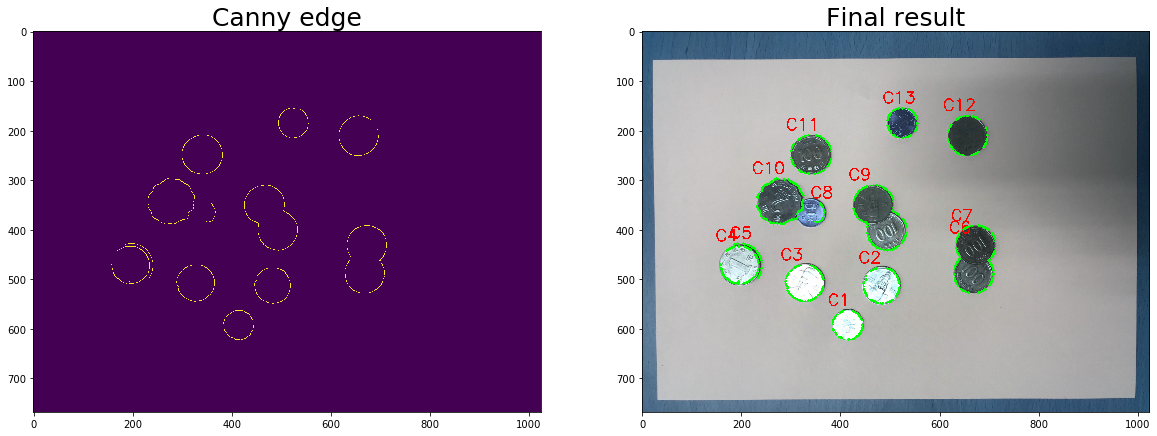

In [5]:
img = cv2.imread('./coin/sIMG_8255.jpg')
       

count(img, gb_kernel=(15,15), lower=50, upper=140)

Number of Contours found = 65


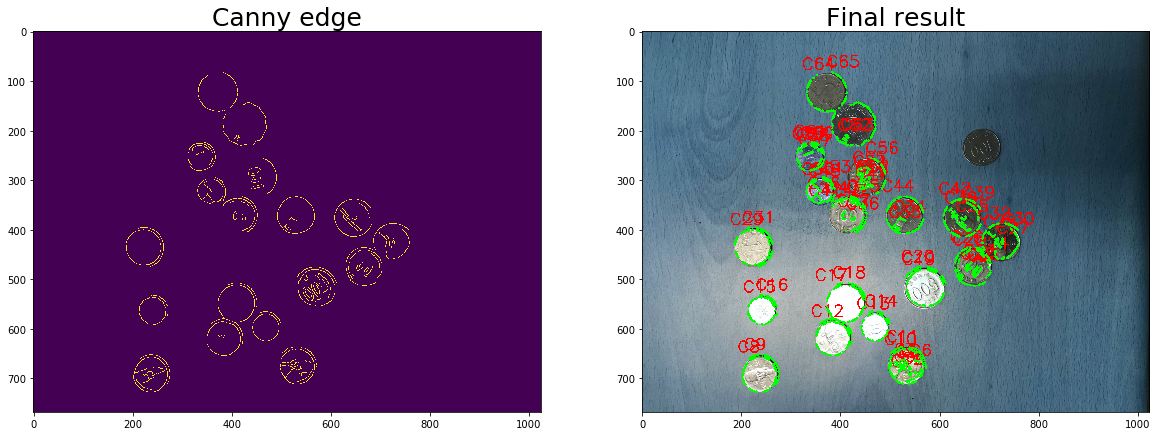

In [6]:
img = cv2.imread('./coin/sIMG_8256.jpg')

count(img, gb_kernel=(11,11), lower=50, upper=110)